Modelo de Vicsek con ruido (SCRIP PARA ANIMACIONES Y OTROS)

In [636]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from math import *
from tqdm import tqdm
import matplotlib.animation as animation
import grispy as gsp
import matplotlib.cm as cm
import matplotlib.colors as colors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Parámetros del sistema y condiciones iniciales

In [637]:
L = 8.6 # Tamaño de la red
W = 0.05 # Ruido
r = 1 # Radio de cada individuo
dt = 1 # Paso de tiempo
tf = 150 # Duración simulación
t = np.linspace(0,tf,int(tf/dt)+1)
N = 300 # Número de individuos
v = 0.3 # Velocidad absoluta de los individuos
theta_0 = np.random.uniform(-np.pi,np.pi,[N]) # Orientación inicial aleatoria de los individuos
x_0 = np.random.uniform(0,L,[N])# Posiciones iniciales aleatorias de los individuos
y_0 = np.random.uniform(0,L,[N])
eps = 1e-10 # para solucionar una cosa de las CC periódicas
print(L,N,N/L**2,W,v)

8.6 300 4.056246619794484 0.05 0.3


Implementación del modelo

In [638]:
p_c = np.zeros(np.size(t))

pos = np.zeros([N,3,np.size(t)]) # Matriz Nx3xsize(t)

pos[:,0,0] = x_0
pos[:,1,0] = y_0
pos[:,2,0] = theta_0

periodic = {0: (0, L), 1: (0, L)}

In [639]:
def angle(x,y):
    if x<0 and y<0: return np.arctan(y/x)-np.pi
    elif x<0 and y>0: return np.arctan(y/x)+np.pi
    else: return np.arctan(y/x)

In [640]:
for i in tqdm(range(np.size(t)-1)):

    grid = gsp.GriSPy(pos[:,0:2,i], N_cells=N, periodic=periodic)

    # contar cuántos individuos están dentro del círculo unidad para cada uno y calcular las nuevas orientaciones
    
    for j in range(N):
        dtheta = np.random.uniform(-np.pi,np.pi)
        cont = 0
        
        bubble_dist, bubble_ind = grid.bubble_neighbors(np.reshape(pos[j,0:2,i],[1,2]), distance_upper_bound=r)

        cont = np.size(bubble_ind)
        b = pos[bubble_ind,2,i]
        
        pos[j,2,i+1] = angle((np.sum(np.cos(b))/cont),(np.sum(np.sin(b))/cont))+W*dtheta
        #pos[j,2,i+1] = angle((np.sum(np.cos(b))/cont)+W*np.cos(dtheta),(np.sum(np.sin(b))/cont)+np.sin(W*dtheta))
    
    # calcular las nuevas posiciones
        
    pos[:,0,i+1] = pos[:,0,i]+v*np.cos(pos[:,2,i+1])*dt
    pos[:,1,i+1] = pos[:,1,i]+v*np.sin(pos[:,2,i+1])*dt

    for j in range(N):
        if pos[j,0,i+1] >= L:
            pos[j,0,i+1] = 0+eps
        if pos[j,0,i+1] <= 0:
            pos[j,0,i+1] = L-eps
        if pos[j,1,i+1] >= L:
            pos[j,1,i+1] = 0+eps
        if pos[j,1,i+1] <= 0:
            pos[j,1,i+1] = L-eps

    # calcular el parámetro de control (momento promedio normalizado)
            
    p_c[i+1] = (1/(N*v))*np.sqrt(np.sum(v*np.cos(pos[:,2,i+1]),axis=0)**2+np.sum(v*np.sin(pos[:,2,i+1]),axis=0)**2)


100%|██████████| 150/150 [05:18<00:00,  2.12s/it]


Representación gráfica

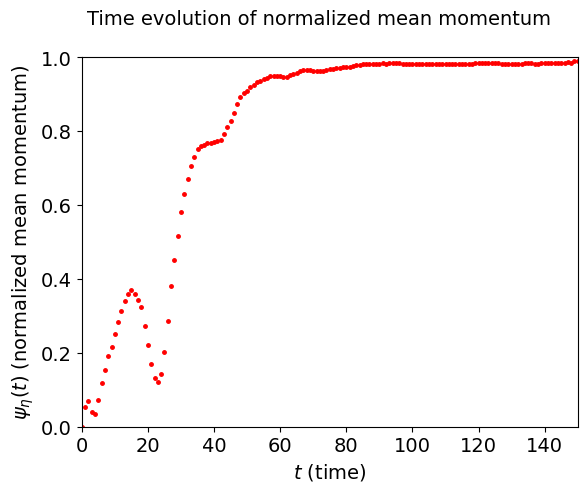

In [641]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.plot(t,p_c,'.',color='red',markersize='5')
plt.xlim([0,tf])
plt.ylim([0,1])
plt.xlabel('$t$ (time)',fontsize = 14)
plt.ylabel(r'$\psi_\eta(t)$ (normalized mean momentum)',fontsize = 14)
plt.suptitle('Time evolution of normalized mean momentum ',fontsize = 14)
plt.savefig('evolution_nmmD.png')

Animación

In [642]:
norm = colors.Normalize(vmin=-np.pi, vmax=np.pi)
f2rgb = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('gist_rainbow'))

In [643]:
def update_map(num,x,y,dx,dy,theta):
    plt.cla()
    
    plt.rc('xtick', labelsize=14) 
    plt.rc('ytick', labelsize=14)
    plt.axis('tight')
    for i in range(N):
        plt.quiver(x[num,i], y[num,i], dx[num,i], dy[num,i], color=f2rgb.to_rgba(theta[num,i])[:3])
    plt.xlim([0,L])
    plt.ylim([0,L])
    plt.title('Evolution of collective dynamics' ,fontsize = 14)
    plt.xlabel('$X$',fontsize = 14)
    plt.ylabel('$Y$',fontsize = 14)
    plt.suptitle('t = '+str(format(num*dt,'.0f')))

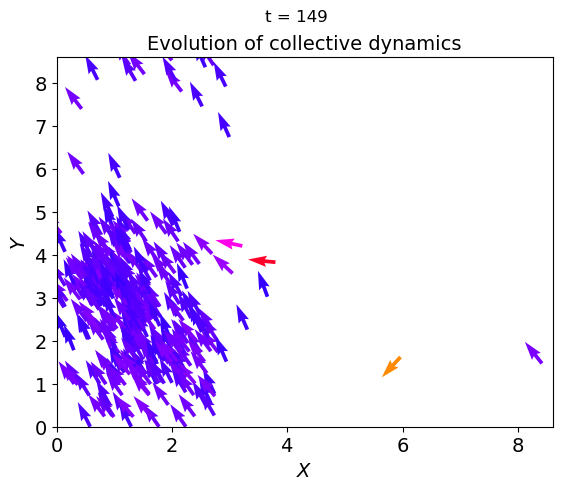

In [644]:
im1 = plt.figure()
fig1 = plt.quiver(pos[:,0,0],pos[:,1,0],v*np.cos(pos[:,2,0]),v*np.sin(pos[:,2,0]))

anim1 = animation.FuncAnimation(im1, update_map, np.size(t)-1, fargs = (np.transpose(pos[:,0,:]),np.transpose(pos[:,1,:]),np.transpose(v*np.cos(pos[:,2,:])),np.transpose(v*np.sin(pos[:,2,:])),np.transpose(pos[:,2,:])), interval = 100)
anim1.save('FIGURA0D.gif')
anim1.save('FIGURA0D.mp4')